In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")


In [2]:
#reading csvs from cleaned data set
cleaned_pop_df = pd.read_csv("../CleanedData/cleaned_population.csv")
cleaned_rental_df = pd.read_csv("../CleanedData/cleaned_rental.csv")

#data set with changing rates
population_df = pd.read_csv("../PopRelated/sorted_population_final.csv")
rental_df = pd.read_csv("rental_rate.csv")
housing_df = pd.read_csv("housing_rate.csv")

#all house price csv 
house_df = pd.read_csv("../RawData/HomePriceFull.csv")



In [3]:
#finding the bottom 20 cities from the dataframe
df1 = housing_df.loc[(housing_df["City"]=="Columbus") & (housing_df["State"]=="GA")]
df2 = housing_df.loc[(housing_df["City"]=="Midland") & (housing_df["State"]=="TX")]
df3 = housing_df.loc[(housing_df["City"]=="Fayetteville") & (housing_df["State"]=="NC")]
df4 = housing_df.loc[(housing_df["City"]=="Tempe") & (housing_df["State"]=="AZ")]
df5 = housing_df.loc[(housing_df["City"]=="Surprise") & (housing_df["State"]=="AZ")]
df6 = housing_df.loc[(housing_df["City"]=="Fremont") & (housing_df["State"]=="CA")]
df7 = housing_df.loc[(housing_df["City"]=="Moreno Valley") & (housing_df["State"]=="CA")]
df8 = housing_df.loc[(housing_df["City"]=="North Las Vegas") & (housing_df["State"]=="NV")]
df9 = housing_df.loc[(housing_df["City"]=="Denton") & (housing_df["State"]=="TX")]
df10 = housing_df.loc[(housing_df["City"]=="Indianapolis") & (housing_df["State"]=="IN")]
df11 = housing_df.loc[(housing_df["City"]=="Omaha") & (housing_df["State"]=="NE")]
df12 = housing_df.loc[(housing_df["City"]=="Pittsburgh") & (housing_df["State"]=="PA")]
df13 = housing_df.loc[(housing_df["City"]=="Newport News") & (housing_df["State"]=="VA")]
df14 = housing_df.loc[(housing_df["City"]=="Ontario") & (housing_df["State"]=="CA")]
df15 = housing_df.loc[(housing_df["City"]=="Tulsa") & (housing_df["State"]=="OK")]
df16 = housing_df.loc[(housing_df["City"]=="Port Saint Lucie") & (housing_df["State"]=="FL")]
df17 = housing_df.loc[(housing_df["City"]=="Saint Louis") & (housing_df["State"]=="MO")]
df18 = housing_df.loc[(housing_df["City"]=="Oklahoma City") & (housing_df["State"]=="OK")]
df19 = housing_df.loc[(housing_df["City"]=="Murfreesboro") & (housing_df["State"]=="TN")]
df20 = housing_df.loc[(housing_df["City"]=="Yonkers") & (housing_df["State"]=="NY")]


In [4]:
#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19,df20]
bottom_df = pd.concat(frames).reset_index(drop=True)
bottom_df.to_csv("FinalBottom20.csv")
bottom_df
  


,Unnamed: 0,City,State,Average2018,Average2019,Average2020,2018-2019 changing rate,2019-2020 changing rate,Diff in 2018-2020 changing rate
0,169,Columbus,GA,9.170492e+04,9.595038e+04,98472.7,4.424643,2.561436,-1.863206
1,204,Midland,TX,2.249067e+05,2.499335e+05,238692.4,10.013373,-4.709434,-14.722807
2,103,Fayetteville,NC,1.093679e+05,1.144015e+05,116637.9,4.399954,1.917354,-2.482600
3,174,Tempe,AZ,2.545154e+05,2.693622e+05,285429.3,5.511851,5.629089,0.117237
4,268,Surprise,AZ,2.315862e+05,2.448392e+05,257194.4,5.412910,4.803855,-0.609055
5,114,Fremont,CA,1.017982e+06,1.006844e+06,976517.9,-1.106252,-3.105487,-1.999235
6,141,Moreno Valley,CA,3.005975e+05,3.140104e+05,320670.6,4.271466,2.076965,-2.194501
7,113,North Las Vegas,NV,2.302898e+05,2.457884e+05,246499.0,6.305674,0.288283,-6.017391
8,276,Denton,TX,2.223987e+05,2.302643e+05,230999.9,3.415907,0.318438,-3.097469
9,13,Indianapolis,IN,1.275192e+05,1.381049e+05,143402.1,7.665019,3.693933,-3.971087


In [5]:
#finding the top 20 cities from the dataframe
df1 = housing_df.loc[(housing_df["City"]=="Salt Lake City") & (housing_df["State"]=="UT")]
df2 = housing_df.loc[(housing_df["City"]=="Hialeah") & (housing_df["State"]=="FL")]
df3 = housing_df.loc[(housing_df["City"]=="Jersey City") & (housing_df["State"]=="NJ")]
df4 = housing_df.loc[(housing_df["City"]=="Irvine") & (housing_df["State"]=="CA")]
df5 = housing_df.loc[(housing_df["City"]=="Alexandria") & (housing_df["State"]=="VA")]
df6 = housing_df.loc[(housing_df["City"]=="Bellevue") & (housing_df["State"]=="WA")]
df7 = housing_df.loc[(housing_df["City"]=="Garland") & (housing_df["State"]=="TX")]
df8 = housing_df.loc[(housing_df["City"]=="Glendale") & (housing_df["State"]=="CA")]
df9 = housing_df.loc[(housing_df["City"]=="Clarksville") & (housing_df["State"]=="TN")]
df10 = housing_df.loc[(housing_df["City"]=="Tampa") & (housing_df["State"]=="FL")]
df11 = housing_df.loc[(housing_df["City"]=="Miami") & (housing_df["State"]=="FL")]
df12 = housing_df.loc[(housing_df["City"]=="Dallas") & (housing_df["State"]=="TX")]
df13 = housing_df.loc[(housing_df["City"]=="Des Moines") & (housing_df["State"]=="IA")]
df14 = housing_df.loc[(housing_df["City"]=="Waco") & (housing_df["State"]=="TX")]
df15 = housing_df.loc[(housing_df["City"]=="Seattle") & (housing_df["State"]=="WA")]
df16 = housing_df.loc[(housing_df["City"]=="Boston") & (housing_df["State"]=="MA")]
df17 = housing_df.loc[(housing_df["City"]=="Irving") & (housing_df["State"]=="TX")]
df18 = housing_df.loc[(housing_df["City"]=="Salem") & (housing_df["State"]=="OR")]
df19 = housing_df.loc[(housing_df["City"]=="Eugene") & (housing_df["State"]=="OR")]
df20 = housing_df.loc[(housing_df["City"]=="Saint Petersburg") & (housing_df["State"]=="FL")]


In [6]:
#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19,df20]
top_df = pd.concat(frames).reset_index(drop=True)
top_df.to_csv("FinalTop20.csv")
top_df


,Unnamed: 0,City,State,Average2018,Average2019,Average2020,2018-2019 changing rate,2019-2020 changing rate,Diff in 2018-2020 changing rate
0,149,Salt Lake City,UT,343422.230769,372636.000000,384241.3,7.839760,3.020316,-4.819445
1,92,Hialeah,FL,253026.230769,265117.384615,266368.7,4.560679,0.469768,-4.090911
2,89,Jersey City,NJ,470107.076923,475416.153846,476522.3,1.116722,0.232129,-0.884593
3,105,Irvine,CA,825541.153846,826222.538462,813541.2,0.082470,-1.558783,-1.641252
4,207,Alexandria,VA,463638.307692,483195.230769,497195.9,4.047416,2.815926,-1.231490
5,247,Bellevue,WA,852965.923077,830981.846154,858318.7,-2.645554,3.184930,5.830485
6,110,Garland,TX,179058.000000,190811.846154,190723.3,6.159914,-0.046427,-6.206341
7,139,Glendale,CA,757527.230769,768068.538462,786395.4,1.372444,2.330489,0.958046
8,185,Clarksville,TN,165156.076923,172943.461538,180537.5,4.502850,4.206350,-0.296500
9,55,Tampa,FL,213695.307692,225127.230769,232594.9,5.077983,3.210590,-1.867393


In [7]:
top_df['City, State']= ''
city_state = top_df['City'].map(str)+', ' + top_df['State'].map(str)
top_df['City, State'] = city_state
bottom_df['City, State']= ''
city_state = bottom_df['City'].map(str)+', ' + bottom_df['State'].map(str)
bottom_df['City, State'] = city_state


In [8]:
pull_columns = ['City, State','2018-2019 changing rate','2019-2020 changing rate']
new_top = top_df[pull_columns]
new_bottom = bottom_df[pull_columns]


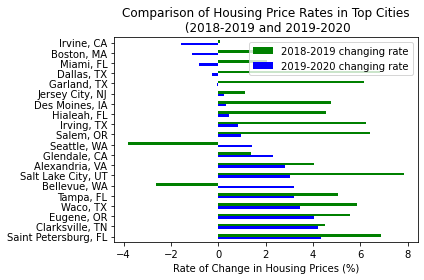

In [9]:
new_top = new_top.sort_values(by='2019-2020 changing rate')
ax = new_top.plot.barh(color=["green","blue"], rot=0)
ax.set_title("Comparison of Housing Price Rates in Top Cities\n (2018-2019 and 2019-2020")
ax.set_xlabel("Rate of Change in Housing Prices (%)")
x_axis = np.arange(new_top["City, State"].nunique())
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(new_top["City, State"]), rotation='horizontal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../Output/Q2TopComparisonRates.png')
plt.show()

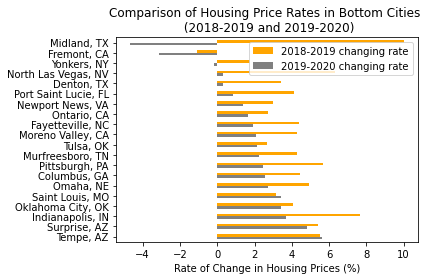

In [10]:
new_bottom= new_bottom.sort_values(by='2019-2020 changing rate')
ax = new_bottom.plot.barh(color=["orange","gray"], rot=0)
ax.set_title("Comparison of Housing Price Rates in Bottom Cities \n (2018-2019 and 2019-2020)")
ax.set_xlabel("Rate of Change in Housing Prices (%)")
x_axis = np.arange(new_bottom["City, State"].nunique())
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(new_bottom["City, State"]), rotation='horizontal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../Output/Q2BottomComparisonRates.png')
plt.show()
